### **Step 1: Aggregate Engagement Metrics**
1. **Calculate Engagement Metrics for Each Customer**:
   - Aggregate the following metrics per customer ID (MSISDN):
     - Session frequency.
     - Session duration.
     - Total session traffic (download and upload in bytes).

2. **Report Top 10 Customers**:
   - Identify and report the top 10 customers for each engagement metric (frequency, duration, total traffic).

### **Step 2: Normalize Metrics and Cluster Users**
1. **Normalize Engagement Metrics**:
   - Normalize each engagement metric to bring them to a common scale.

2. **Run k-Means Clustering (k=3)**:
   - Apply k-means clustering with k=3 to classify customers into three groups based on their engagement metrics.

3. **Analyze Clusters**:
   - For each cluster, compute the minimum, maximum, average, and total non-normalized metrics.
   - Interpret the results visually using appropriate charts and provide text explanations.

### **Step 3: Application-Specific Engagement Analysis**
1. **Aggregate Total Traffic per Application**:
   - For each application, aggregate the total traffic (download + upload) per user.
   - Identify the top 10 most engaged users for each application.

2. **Visualize Top 3 Most Used Applications**:
   - Plot the top 3 most used applications using suitable charts (e.g., bar charts, pie charts).
   - Interpret the visualizations to understand user engagement with these applications.

### **Step 4: Optimize k-Means Clustering**
1. **Determine the Optimal Number of Clusters (k)**:
   - Use the elbow method to find the optimized value of k for clustering users based on engagement metrics.
   - Rerun the k-means clustering with this optimized k value.

2. **Interpret Findings**:
   - Analyze and interpret the clustering results. Explain what the clusters represent in terms of user engagement and how they can be used to improve network resource allocation.

### **Step 5: Reporting**
1. **Create a Python Script**:
   - Write a Python script to automate the above analyses and generate the necessary outputs.

2. **Prepare a Slide Presentation**:
   - Summarize your findings in a slide presentation.
   - Include visualizations and interpretations of the results, particularly focusing on how the clusters can inform business decisions.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [2]:
path = '/kaggle/input/kaim-w2/Week2_challenge_data_source.csv'

In [3]:
# Load the telecom dataset
df = pd.read_csv(path)

# Display the first few rows of the dataset
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.16457E+15,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311450e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311450e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311450e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311450e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [4]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [5]:
# Task 2.1 - Aggregate the following engagement metrics per customer ID (MSISDN)
agg_data = df.groupby('MSISDN/Number').agg({
    'Bearer Id': 'sum',                 # Session frequency
    'Dur. (ms)': 'sum',             # Session duration
    'Total DL (Bytes)': 'sum',             # Download traffic
    'Total UL (Bytes)': 'sum'              # Upload traffic
})

# Compute total traffic (Download + Upload)
agg_data['Total Traffic (Bytes)'] = agg_data['Total DL (Bytes)'] + agg_data['Total UL (Bytes)']

# Display the aggregated data
print("Aggregated Data Per User:")
agg_data.head()

Aggregated Data Per User:


,Bearer Id,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Total Traffic (Bytes)
MSISDN/Number,,,,,
3.360100e+10,1.311450e+19,116720.0,8.426375e+08,36053108.0,8.786906e+08
3.360100e+10,7.349880e+18,181230.0,1.207552e+08,36104459.0,1.568596e+08
3.360100e+10,7.349880e+18,134969.0,5.566597e+08,39306820.0,5.959665e+08
3.360101e+10,1.304240e+19,49878.0,4.019932e+08,20327526.0,4.223207e+08
3.360101e+10,1.462771e+19,37104.0,1.363130e+09,94280527.0,1.457411e+09


In [6]:
# Task 2.2 - Normalize each engagement metric
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(agg_data), columns=agg_data.columns, index=agg_data.index)

print("\nNormalized Engagement Data:")
normalized_data.head()


Normalized Engagement Data:


,Bearer Id,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Total Traffic (Bytes)
MSISDN/Number,,,,,
3.360100e+10,0.059129,0.005908,0.102334,0.045666,0.095931
3.360100e+10,0.033138,0.009387,0.013737,0.045737,0.014026
3.360100e+10,0.033138,0.006892,0.067236,0.050144,0.063851
3.360101e+10,0.058804,0.002304,0.048254,0.024027,0.044148
3.360101e+10,0.065952,0.001615,0.166215,0.125791,0.161598


In [7]:
# Task 2.3 - Apply K-Means clustering (k=3) to classify customers into 3 groups
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(normalized_data)
agg_data['Engagement Cluster'] = kmeans.labels_

# Compute minimum, maximum, average & total metrics per cluster
cluster_stats = agg_data.groupby('Engagement Cluster').agg({
    'Bearer Id': ['min', 'max', 'mean', 'sum'],
    'Dur. (ms)': ['min', 'max', 'mean', 'sum'],
    'Total Traffic (Bytes)': ['min', 'max', 'mean', 'sum']
})

print("\nCluster Statistics (Min, Max, Avg, Total):")
cluster_stats

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Cluster Statistics (Min, Max, Avg, Total):


Bearer Id                                            \
                             min           max          mean           sum   
Engagement Cluster                                                           
0                   0.000000e+00  3.934350e+19  1.014978e+19  8.402594e+23   
1                   2.161730e+19  2.217929e+20  5.220082e+19  1.992505e+23   
2                   0.000000e+00  5.245800e+19  2.307530e+19  4.673440e+23   

                   Dur. (ms)                                           \
                         min         max           mean           sum   
Engagement Cluster                                                      
0                     7142.0   2083209.0  108685.984079  8.997678e+09   
1                    46896.0  18553754.0  575483.705004  2.196621e+09   
2                     9835.0   3174824.0  218463.362267  4.424538e+09   

                   Total Traffic (Bytes)                              \
                                     min           max          mean   
Engagement Cluster                                                     
0                           3.324901e+07  1.004127e+09  5.000141e+08   
1                           1.085994e+09  8.846226e+09  2.303563e+09   
2                           2.842182e+08  2.211956e+09  1.167559e+09   

                                  
                             sum  
Engagement Cluster                
0                   4.139417e+13  
1                   8.792700e+12  
2                   2.364658e+13

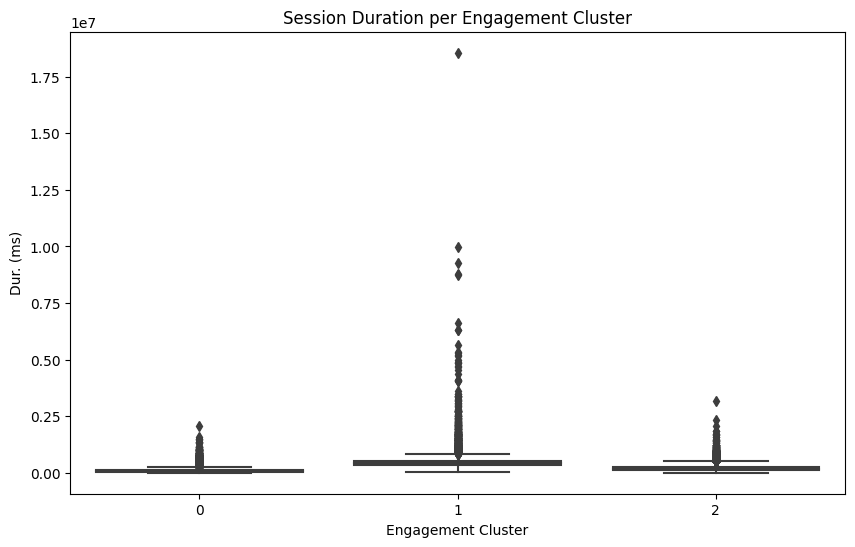

In [8]:
# Task 2.4 - Visualize the cluster results
plt.figure(figsize=(10, 6))
sns.boxplot(x='Engagement Cluster', y='Dur. (ms)', data=agg_data.reset_index())
plt.title('Session Duration per Engagement Cluster')
plt.show()


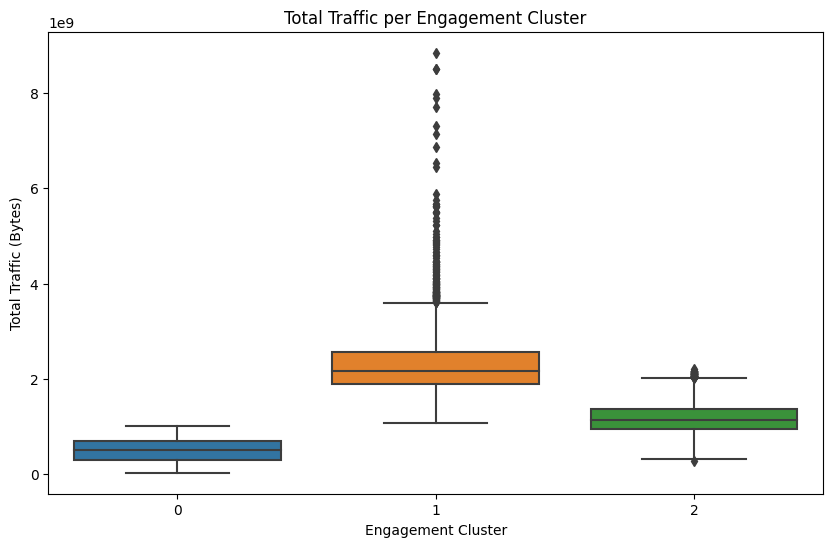

In [9]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='Engagement Cluster', y='Total Traffic (Bytes)', data=agg_data.reset_index())
plt.title('Total Traffic per Engagement Cluster')
plt.show()

In [11]:
# Task 2.5 - Aggregate user total traffic per application (e.g., Social Media, Youtube) and derive the top 10 most engaged users per application
app_columns = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)',
               'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
               'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
               'Email DL (Bytes)', 'Email UL (Bytes)',
               'Google DL (Bytes)', 'Google UL (Bytes)']

# Calculate total traffic for each application and sum across DL and UL
app_data = df.groupby('MSISDN/Number')[app_columns].sum().reset_index()

# Add total traffic for each application (DL + UL)
for col in app_columns:
    app_data[col] = df[col].fillna(0)  # Ensure no missing values

# Compute total traffic for each user per application
top_users_per_app = pd.melt(app_data, id_vars='MSISDN/Number', value_vars=app_columns, 
                            var_name='Application', value_name='Total Traffic (Bytes)')

# Get the top 10 most engaged users per application
top_10_users_per_app = top_users_per_app.groupby('Application').apply(lambda x: x.nlargest(10, 'Total Traffic (Bytes)')).reset_index(drop=True)
print("\nTop 10 Most Engaged Users per Application:")
print(top_10_users_per_app.head())



Top 10 Most Engaged Users per Application:
   MSISDN/Number       Application  Total Traffic (Bytes)
0   3.369847e+10  Email DL (Bytes)              3586128.0
1   3.362450e+10  Email DL (Bytes)              3586054.0
2   3.366599e+10  Email DL (Bytes)              3586035.0
3   3.365923e+10  Email DL (Bytes)              3586034.0
4   3.366021e+10  Email DL (Bytes)              3585992.0


/tmp/ipykernel_35/1869122678.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_10_users_per_app = top_users_per_app.groupby('Application').apply(lambda x: x.nlargest(10, 'Total Traffic (Bytes)')).reset_index(drop=True)



Top 3 Most Used Applications:
          Application  Total Traffic (Bytes)
2   Gaming DL (Bytes)           4.513573e+13
8  Youtube DL (Bytes)           1.241108e+12
9  Youtube UL (Bytes)           1.175367e+12


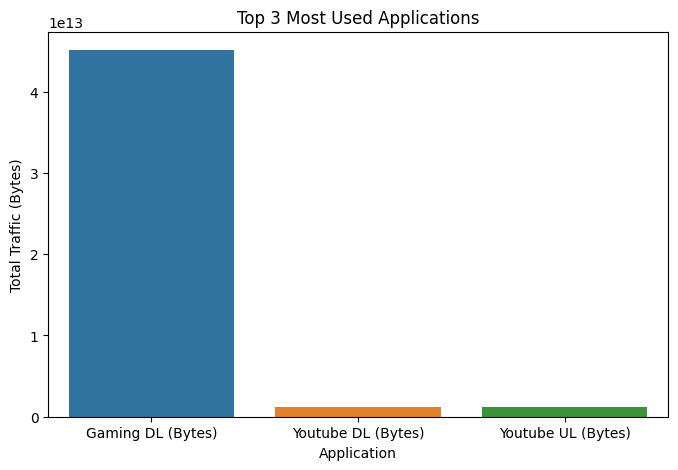

In [12]:
# Task 2.6 - Plot the top 3 most used applications using appropriate charts
app_totals = top_users_per_app.groupby('Application')['Total Traffic (Bytes)'].sum().reset_index()
app_totals['Application'] = app_totals['Application'].str.replace(' DL \\(Bytes\\)', '')  # Clean up app names

top_3_apps = app_totals.nlargest(3, 'Total Traffic (Bytes)')
print("\nTop 3 Most Used Applications:")
print(top_3_apps)

# Bar plot of top 3 applications
plt.figure(figsize=(8, 5))
sns.barplot(x='Application', y='Total Traffic (Bytes)', data=top_3_apps)
plt.title('Top 3 Most Used Applications')
plt.xlabel('Application')
plt.ylabel('Total Traffic (Bytes)')
plt.show()


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

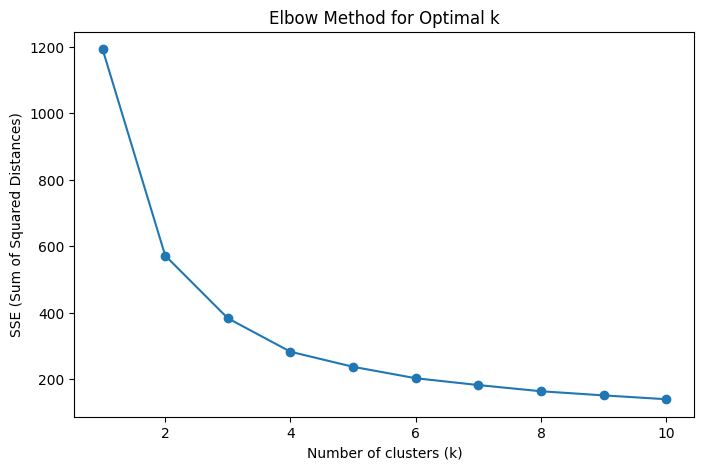

In [13]:
# Task 2.7 - K-means clustering to group users into engagement clusters based on engagement metrics
# Elbow Method to find the optimized value of k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_data)
    sse.append(kmeans.inertia_)

# Plot the SSE (Elbow Curve)
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE (Sum of Squared Distances)')
plt.show()

## Task 2.1 - Aggregate the following engagement metrics per customer ID (MSISDN/Number)

In [15]:
# Task 2.1 - Aggregate the following engagement metrics per customer ID (MSISDN/Number)
agg_data = df.groupby('MSISDN/Number').agg({
    'Dur. (ms)': 'sum',                   # Session duration
    'Total DL (Bytes)': 'sum',             # Download traffic
    'Total UL (Bytes)': 'sum'              # Upload traffic
}).rename(columns={
    'Dur. (ms)': 'Session Duration',
    'Total DL (Bytes)': 'Total DL (Bytes)',
    'Total UL (Bytes)': 'Total UL (Bytes)'
})

# Compute total traffic (Download + Upload)
agg_data['Total Traffic (Bytes)'] = agg_data['Total DL (Bytes)'] + agg_data['Total UL (Bytes)']

# Display the aggregated data
print("Aggregated Data Per User:")
agg_data.head()

Aggregated Data Per User:


,Session Duration,Total DL (Bytes),Total UL (Bytes),Total Traffic (Bytes)
MSISDN/Number,,,,
3.360100e+10,116720.0,8.426375e+08,36053108.0,8.786906e+08
3.360100e+10,181230.0,1.207552e+08,36104459.0,1.568596e+08
3.360100e+10,134969.0,5.566597e+08,39306820.0,5.959665e+08
3.360101e+10,49878.0,4.019932e+08,20327526.0,4.223207e+08
3.360101e+10,37104.0,1.363130e+09,94280527.0,1.457411e+09


## Task 2.2 - Normalize each engagement metric

In [16]:
# Task 2.2 - Normalize each engagement metric
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(agg_data), columns=agg_data.columns, index=agg_data.index)

print("\nNormalized Engagement Data:")
normalized_data.head())


Normalized Engagement Data:


,Session Duration,Total DL (Bytes),Total UL (Bytes),Total Traffic (Bytes)
MSISDN/Number,,,,
3.360100e+10,0.005908,0.102334,0.045666,0.095931
3.360100e+10,0.009387,0.013737,0.045737,0.014026
3.360100e+10,0.006892,0.067236,0.050144,0.063851
3.360101e+10,0.002304,0.048254,0.024027,0.044148
3.360101e+10,0.001615,0.166215,0.125791,0.161598


## Task 2.3 - Apply K-Means clustering (k=3) to classify customers into 3 groups

In [17]:
# Task 2.3 - Apply K-Means clustering (k=3) to classify customers into 3 groups
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(normalized_data)
agg_data['Engagement Cluster'] = kmeans.labels_

# Compute minimum, maximum, average & total metrics per cluster
cluster_stats = agg_data.groupby('Engagement Cluster').agg({
    'Session Duration': ['min', 'max', 'mean', 'sum'],
    'Total Traffic (Bytes)': ['min', 'max', 'mean', 'sum']
})

print("\nCluster Statistics (Min, Max, Avg, Total):")
cluster_stats

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Cluster Statistics (Min, Max, Avg, Total):


Session Duration                                           \
                                min         max           mean           sum   
Engagement Cluster                                                             
0                            7142.0   1573420.0  107492.246253  5.874559e+09   
1                           23292.0  18553754.0  424132.934650  3.348954e+09   
2                            7146.0   3174824.0  144334.678147  6.395325e+09   

                   Total Traffic (Bytes)                              \
                                     min           max          mean   
Engagement Cluster                                                     
0                             33249009.0  7.009889e+08  3.609431e+08   
1                            944797678.0  8.846226e+09  1.927277e+09   
2                            455171340.0  1.677345e+09  8.776945e+08   

                                  
                             sum  
Engagement Cluster                
0                   1.972590e+13  
1                   1.521778e+13  
2                   3.888976e+13

## Task 2.4 - Visualize the cluster results

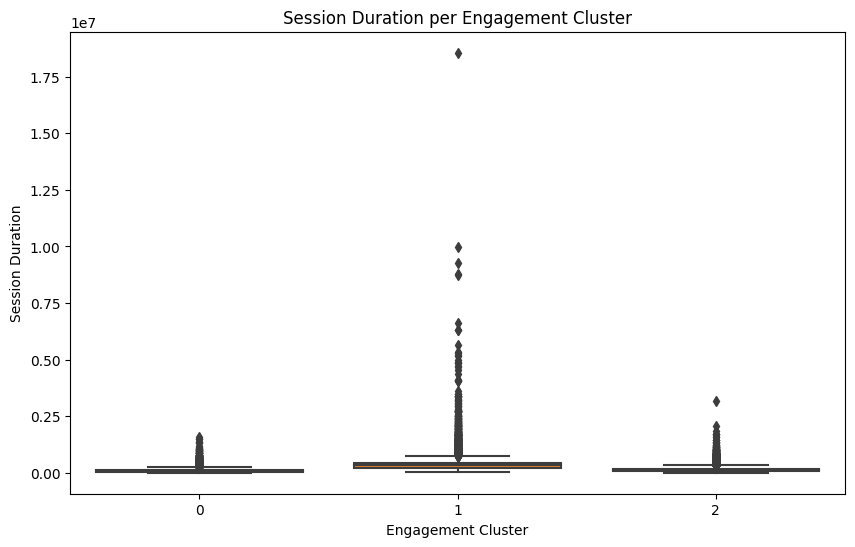

In [19]:
# Task 2.4 - Visualize the cluster results
plt.figure(figsize=(10, 6))
sns.boxplot(x='Engagement Cluster', y='Session Duration', data=agg_data.reset_index())
plt.title('Session Duration per Engagement Cluster')
plt.show()

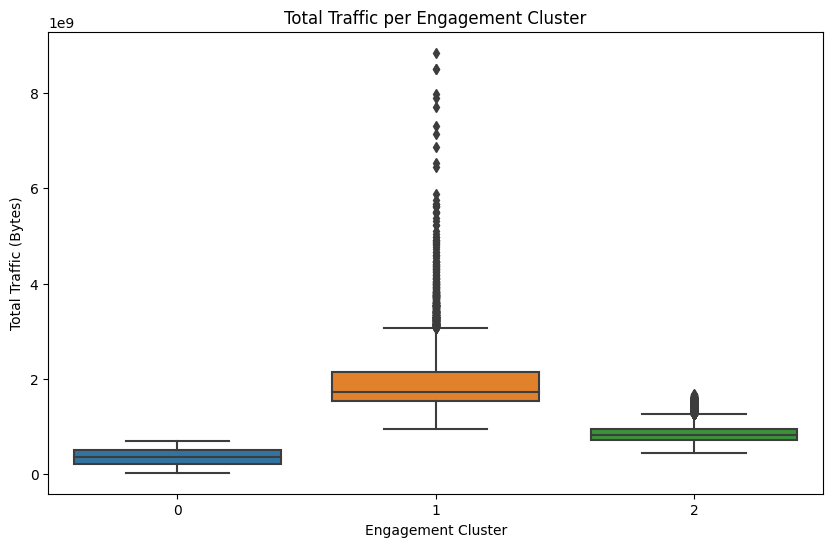

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Engagement Cluster', y='Total Traffic (Bytes)', data=agg_data.reset_index())
plt.title('Total Traffic per Engagement Cluster')
plt.show()

## Task 2.5 - Aggregate user total traffic per application (e.g., Social Media, Youtube) and derive the top 10 most engaged users per application

In [21]:
# Task 2.5 - Aggregate user total traffic per application (e.g., Social Media, Youtube) and derive the top 10 most engaged users per application
app_columns = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)',
               'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
               'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
               'Email DL (Bytes)', 'Email UL (Bytes)',
               'Google DL (Bytes)', 'Google UL (Bytes)']

# Calculate total traffic for each application and sum across DL and UL
app_data = df.groupby('MSISDN/Number')[app_columns].sum().reset_index()

# Add total traffic for each application (DL + UL)
for col in app_columns:
    app_data[col] = df[col].fillna(0)  # Ensure no missing values

# Compute total traffic for each user per application
top_users_per_app = pd.melt(app_data, id_vars='MSISDN/Number', value_vars=app_columns, 
                            var_name='Application', value_name='Total Traffic (Bytes)')

# Get the top 10 most engaged users per application
top_10_users_per_app = top_users_per_app.groupby('Application').apply(lambda x: x.nlargest(10, 'Total Traffic (Bytes)')).reset_index(drop=True)
print("\nTop 10 Most Engaged Users per Application:")
top_10_users_per_app.head()


Top 10 Most Engaged Users per Application:


/tmp/ipykernel_35/2602211536.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_10_users_per_app = top_users_per_app.groupby('Application').apply(lambda x: x.nlargest(10, 'Total Traffic (Bytes)')).reset_index(drop=True)


,MSISDN/Number,Application,Total Traffic (Bytes)
0,3.369847e+10,Email DL (Bytes),3586128.0
1,3.362450e+10,Email DL (Bytes),3586054.0
2,3.366599e+10,Email DL (Bytes),3586035.0
3,3.365923e+10,Email DL (Bytes),3586034.0
4,3.366021e+10,Email DL (Bytes),3585992.0


## Task 2.6 - Plot the top 3 most used applications using appropriate charts

In [23]:
# Task 2.6 - Plot the top 3 most used applications using appropriate charts
app_totals = top_users_per_app.groupby('Application')['Total Traffic (Bytes)'].sum().reset_index()
app_totals['Application'] = app_totals['Application'].str.replace(' DL \\(Bytes\\)', '')  # Clean up app names

top_3_apps = app_totals.nlargest(3, 'Total Traffic (Bytes)')
print("\nTop 3 Most Used Applications:")
top_3_apps


Top 3 Most Used Applications:


,Application,Total Traffic (Bytes)
2,Gaming DL (Bytes),4.513573e+13
8,Youtube DL (Bytes),1.241108e+12
9,Youtube UL (Bytes),1.175367e+12


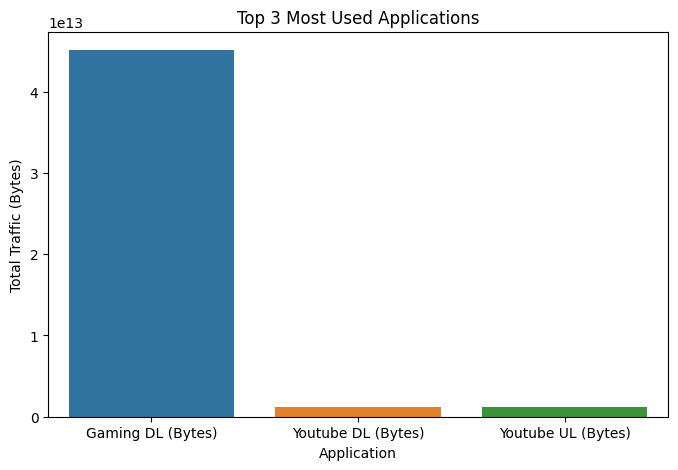

In [24]:
# Bar plot of top 3 applications
plt.figure(figsize=(8, 5))
sns.barplot(x='Application', y='Total Traffic (Bytes)', data=top_3_apps)
plt.title('Top 3 Most Used Applications')
plt.xlabel('Application')
plt.ylabel('Total Traffic (Bytes)')
plt.show()

## Task 2.7 - K-means clustering to group users into engagement clusters based on engagement metrics

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

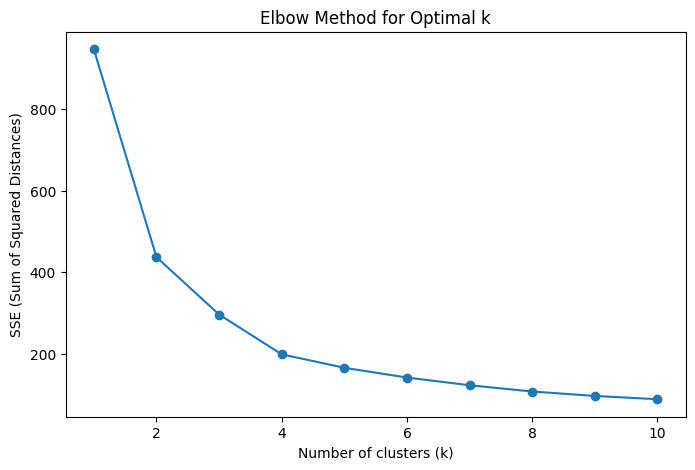

In [25]:
# Task 2.7 - K-means clustering to group users into engagement clusters based on engagement metrics
# Elbow Method to find the optimized value of k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_data)
    sse.append(kmeans.inertia_)

# Plot the SSE (Elbow Curve)
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE (Sum of Squared Distances)')
plt.show()